# **Project 3 Report**

Antonio Lang

CS458

P3-1. Text Documents Classification on 20 newsgroup dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups
# Fetches the training and test data sets
newsdata_train = fetch_20newsgroups(subset='train',categories=['rec.autos','talk.religion.misc','comp.graphics','sci.space'])
newsdata_test = fetch_20newsgroups(subset='test',categories=['rec.autos','talk.religion.misc','comp.graphics','sci.space'])

In [3]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vector_train = vectorizer.fit_transform(newsdata_train.data)
vector_test = vectorizer.transform(newsdata_test.data)
x1 = vector_train
y1 = newsdata_train.target
x2 = vector_test
y2 = newsdata_test.target

models = []

# each model created with various hyperparameters
svm = LinearSVC(random_state=0, tol=1e-5)
nb = MultinomialNB(alpha=0.01)
knn = KNeighborsClassifier(n_neighbors=20)
rf = ensemble.RandomForestClassifier(n_estimators=150)
ada = ensemble.AdaBoostClassifier(n_estimators=50)

models.append((svm, 'SVM'))
models.append((nb, 'Naive Bayes'))
models.append((knn, 'K-Nearest Neighbors'))
models.append((rf, 'Random Forest'))
models.append((ada, 'AdaBoost'))

# Tests each model agains the testing set and outputs its accuracy
for model in models:
    model[0].fit(x1,y1)
    score = model[0].score(x2,y2)
    print(f"{model[1]} score: {score}")

SVM score: 0.9202797202797203
Naive Bayes score: 0.9524475524475524
K-Nearest Neighbors score: 0.6
Random Forest score: 0.8797202797202798
AdaBoost score: 0.7594405594405594


P3-2. Recognizing Hand-Written Digits

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn as sk

# loads and splits the data
digits = datasets.load_digits()
x1,x2,y1,y2 = train_test_split(digits.data, digits.target, test_size=0.5)

1.1.3


Neural Network accuracy: 0.9699666295884316
Support Vector Machine accuracy: 0.967741935483871
Neural Network Confusion Matrix


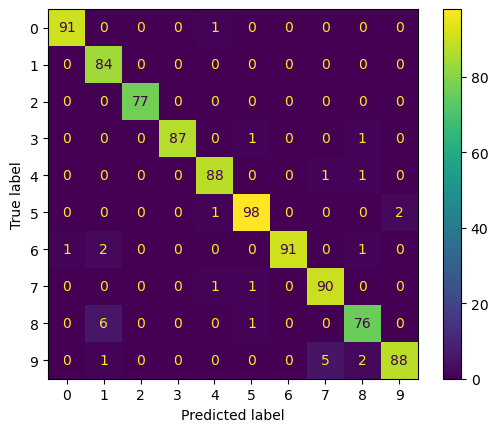

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

NN = MLPClassifier(hidden_layer_sizes=(750,), activation='relu', alpha=0.00001,
                    learning_rate='constant', max_iter=750)
SVM = svm.SVC(gamma=0.0001)
NN.fit(x1,y1)
SVM.fit(x1,y1)
NN_predictions = NN.predict(x2)
SVM_predictions = SVM.predict(x2)
print(f"Neural Network accuracy: {accuracy_score(y2, NN_predictions)}")
print(f"Support Vector Machine accuracy: {accuracy_score(y2, SVM_predictions)}")
confusion = confusion_matrix(y2, NN_predictions)
print(f"Neural Network Confusion Matrix")
disp = ConfusionMatrixDisplay.from_predictions(y2, SVM_predictions)

P3-3. Nonlinear Support Vector Machine

In [6]:
import numpy as np
np.random.seed(0)
X = np.random.rand(300,2)*10-5
Y = np.logical_xor(X[:,0]>0,X[0:,1]>0)

In [16]:
from sklearn.svm import NuSVC

nonlinearSVM = NuSVC()
nonlinearSVM.fit(X,Y)
predictions = nonlinearSVM.predict(X)

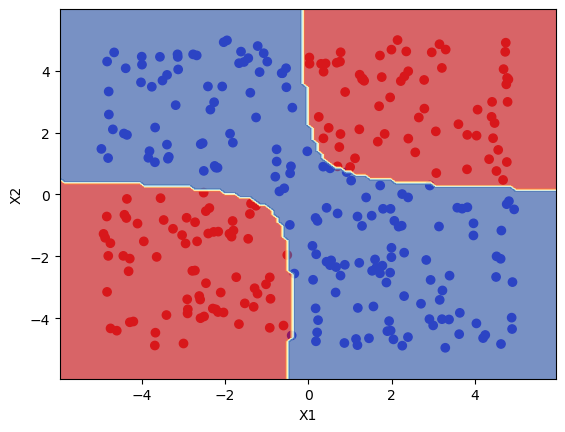

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0], X[:,1], c=predictions, cmap=colors.ListedColormap(['red', 'blue']))

# gets data for bounds of the plot
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),np.linspace(y_min, y_max, 100))
Z = nonlinearSVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7 ) # plots the decision boundary
print()

### Resources
- https://copyprogramming.com/code/plotting-3d-decision-boundary-from-linear-svm